In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_source = pd.read_excel("Ex2.xlsx", engine='openpyxl')
df = df_source

In [4]:
df = df.rename(columns={'Регион': 'region', 'Номер магазина': 'shop_number', 'Торговая площадь округл.': 'retail_s', \
                   'Населенный пункт': 'locality', 'Месторасположение': 'place', 'ТЦ': 'mall', 'Точка притяжения': 'point_c', 'Парковка': 'parking',\
                   'Трафик': 'traffic', 'Витрины ': 'storefronts'})

In [5]:
#df.index.names = [_name.replace(' ', '_') for _name in df.index.names]
df.columns = df.columns.str.replace('категория ', 'cat_')

In [6]:
for i in df.columns:
    if 'cat' in i:
        df[i] = df[i] * 100
df.head()

,region,shop_number,retail_s,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,...,cat_29,cat_30,cat_31,locality,place,mall,point_c,parking,traffic,storefronts
0,г. Санкт-Петербург(офис: г. Санкт-Петербург),1,100,0.4,3.1,8.4,2.0,0.4,6.0,0.9,...,0.6,1.5,5.5,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто
1,г. Санкт-Петербург(офис: г. Санкт-Петербург),2,120,0.7,3.2,10.9,2.3,0.8,5.8,0.8,...,0.6,1.8,4.9,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,Во дворе с малой проходимостью,пусто
2,г. Санкт-Петербург(офис: г. Санкт-Петербург),5,80,0.4,3.4,9.2,1.7,0.4,5.9,1.0,...,0.7,1.4,4.9,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),Наличие витрин
3,г. Санкт-Петербург(офис: г. Санкт-Петербург),6,120,0.5,3.4,14.4,2.2,0.5,5.7,0.9,...,0.7,1.3,4.6,Город,Спальный район,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто
4,г. Санкт-Петербург(офис: г. Санкт-Петербург),8,100,0.5,4.0,7.7,1.4,0.4,6.0,1.0,...,1.1,1.6,4.7,Город,Центр города,пусто,Гостиницы,пусто,Центральная улица,Наличие витрин


In [7]:
# Готовим данные в таблице для запуска k-mean
#

#Регион 
'''
г. Санкт-Петербург(офис: г. Санкт-Петербург)     1
Мурманская обл.(офис: Мурманская обл.)           2
Ленинградская обл.(офис: г. Санкт-Петербург)     3
Новгородская обл.(офис: Новгородская обл.)       4
Карелия респ.(офис: Карелия респ.)               5
Псковская обл.(офис: Псковская обл.)             6
Московская обл.(офис: Московская обл.)           7
г. Москва(офис: Московская обл.)                 8
Ярославская обл.(офис: Ярославская обл.)         9
Тверская обл.(офис: Псковская обл.)              10
Вологодская обл.(офис: Карелия респ.)            11
'''
df.region.value_counts()

df.region = df.region.replace('г. Санкт-Петербург(офис: г. Санкт-Петербург)', 1)
df.region = df.region.replace('Мурманская обл.(офис: Мурманская обл.)', 2)
df.region = df.region.replace('Ленинградская обл.(офис: г. Санкт-Петербург)', 3)
df.region = df.region.replace('Новгородская обл.(офис: Новгородская обл.)', 4)
df.region = df.region.replace('Карелия респ.(офис: Карелия респ.)', 5)
df.region = df.region.replace('Псковская обл.(офис: Псковская обл.)', 6)
df.region = df.region.replace('Московская обл.(офис: Московская обл.)', 7)
df.region = df.region.replace('г. Москва(офис: Московская обл.)', 8)
df.region = df.region.replace('Ярославская обл.(офис: Ярославская обл.)', 9)
df.region = df.region.replace('Тверская обл.(офис: Псковская обл.)', 10)
df.region = df.region.replace('Вологодская обл.(офис: Карелия респ.)', 11)

df.region.value_counts()

1     138
2      70
3      55
4      30
5      27
6      22
7      19
9      16
8      16
10      2
11      1
Name: region, dtype: int64

In [8]:
# Населенный пункт
# Город - 1
# Область - 2
# Моногород - 3
df.locality = df.locality.replace('Город', 1)
df.locality = df.locality.replace('Область', 2)
df.locality = df.locality.replace('Моногород', 3)

In [9]:
# Проверяем не забыли ли чего в столбце
# Странные вещи, что регион г. СПб попадает под локацию Моногород. Необходимо ли заменить?
df.locality.value_counts()

1    262
2    120
3     14
Name: locality, dtype: int64

In [10]:
# ТЦ
# пусто - 0
# Локальный ТЦ (рядом жилой массив 500 м, мы являемся точкой притяжения) - 1
# Торгово- Развлекательный Комплекс районного масштаба - 2
# ТЦ премиум (рядом может быть жилой массив, присутствует федеральный супермаркет, сам ТЦ-является точкой притяжения) - 3
df.mall.value_counts()

df.mall = df.mall.replace('пусто', 0)
df.mall = df.mall.replace('Локальный ТЦ (рядом жилой массив 500 м, мы являемся точкой притяжения)', 1)
df.mall = df.mall.replace('Торгово- Развлекательный Комплекс районного масштаба', 2)
df.mall = df.mall.replace('ТЦ премиум (рядом может быть жилой массив, присутствует федеральный супермаркет, сам ТЦ-является точкой притяжения)', 3)



In [11]:
df.mall.value_counts()

0    269
1     72
2     34
3     21
Name: mall, dtype: int64

In [12]:
# Месторасположение
# Спальный район - 1
# Центр города - 2
# Торговый центр - 3
# Офисы (Бизнес-центр) - 4
df.place.value_counts()

df.place = df.place.replace('Спальный район', 1)
df.place = df.place.replace('Центр города', 2)
df.place = df.place.replace('Торговый центр', 3)
df.place = df.place.replace('Офисы (Бизнес-центр)', 4)


In [13]:
# Точка притяжения
#
# пусто - 0
# Магазины стрит-ритейла продукты - 1
# Банк, Почта, Аптека, Рынок, Мед. учреждения - 2
# Торговый центр - 3
# Наличие общественных мест рядом с магазином (парк, фонтан, площадь где проводят праздники и т.д.) - 4
# Детские уч-я - 5
# Учебные заведения - 6
# Гостиницы - 7

df.point_c.value_counts()

df.point_c = df.point_c.replace('пусто', 0)
df.point_c = df.point_c.replace('Магазины стрит-ритейла продукты', 1)
df.point_c = df.point_c.replace('Банк, Почта, Аптека, Рынок, Мед. учреждения', 2)
df.point_c = df.point_c.replace('Торговый центр ', 3)
df.point_c = df.point_c.replace('Наличие общественных мест рядом с магазином (парк, фонтан, площадь где проводят праздники и т.д.)', 4)
df.point_c = df.point_c.replace('Детские уч-я', 5)
df.point_c = df.point_c.replace('Учебные заведения', 6)
df.point_c = df.point_c.replace('Гостиницы', 7)

In [14]:
# Наличие парковки
#
# пусто - 0
# Наличие парковки - 1

df.parking.value_counts()

df.parking = df.parking.replace('пусто', 0)
df.parking = df.parking.replace('Наличие парковки', 1)

In [15]:
# Трафик
#
# В шаговой доступности от жил массива (500 метров) - 1
# Центральная улица - 2
# Остановка общественного транспорта, в т.ч. метро - 3
# Остановка общественного транспорта, в т.ч. Метро - 3
# На пересечении улиц - 4
# Во дворе с малой проходимостью - 5


df.traffic.value_counts()

df.traffic = df.traffic.replace('В шаговой доступности от жил массива (500 метров)', 1)
df.traffic = df.traffic.replace('Центральная улица ', 2)
df.traffic = df.traffic.replace('Остановка общественного транспорта, в т.ч. метро', 3)
df.traffic = df.traffic.replace('Остановка общественного транспорта, в т.ч. Метро', 3)
df.traffic = df.traffic.replace('На пересечении улиц ', 4)
df.traffic = df.traffic.replace('Во дворе с малой проходимостью', 5)


In [16]:
df.traffic.value_counts()

1    163
2    121
3     64
4     36
5     12
Name: traffic, dtype: int64

In [17]:
# Витрины
#
# пусто - 0
# Наличие витрин - 1

df.storefronts.value_counts()

df.storefronts = df.storefronts.replace('пусто', 0)
df.storefronts = df.storefronts.replace('Наличие витрин', 1)


In [18]:
df.storefronts.value_counts()

1    217
0    179
Name: storefronts, dtype: int64

In [19]:
df.tail()

,region,shop_number,retail_s,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,...,cat_29,cat_30,cat_31,locality,place,mall,point_c,parking,traffic,storefronts
391,2,609,100,0.7,2.5,7.3,2.8,0.7,6.8,0.5,...,0.8,3.8,6.1,2,1,0,1,1,1,0
392,2,611,240,0.5,3.0,13.5,1.8,0.6,5.7,0.6,...,0.8,1.7,4.9,1,2,2,1,1,1,0
393,2,612,180,0.5,2.9,12.6,2.9,0.8,5.7,0.6,...,0.9,2.2,4.6,1,1,2,1,1,1,0
394,2,613,100,0.6,2.8,9.4,2.2,0.5,5.7,0.6,...,0.9,2.5,5.6,1,1,0,1,1,1,0
395,2,614,120,0.6,2.5,7.3,2.3,0.5,7.5,0.4,...,0.8,2.9,6.6,3,1,0,1,1,1,0


In [20]:
df.describe()
df = df.drop(df.columns[1], axis=1)
df.head()

,region,retail_s,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,...,cat_29,cat_30,cat_31,locality,place,mall,point_c,parking,traffic,storefronts
0,1,100,0.4,3.1,8.4,2.0,0.4,6.0,0.9,3.0,...,0.6,1.5,5.5,1,1,0,1,1,1,0
1,1,120,0.7,3.2,10.9,2.3,0.8,5.8,0.8,3.5,...,0.6,1.8,4.9,1,1,0,1,1,5,0
2,1,80,0.4,3.4,9.2,1.7,0.4,5.9,1.0,2.9,...,0.7,1.4,4.9,1,1,0,1,1,1,1
3,1,120,0.5,3.4,14.4,2.2,0.5,5.7,0.9,2.7,...,0.7,1.3,4.6,1,1,1,1,1,1,0
4,1,100,0.5,4.0,7.7,1.4,0.4,6.0,1.0,4.3,...,1.1,1.6,4.7,1,2,0,7,0,2,1


In [21]:
from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha = 0.5, figsize=(15,15))

In [22]:
corr = df.corr()

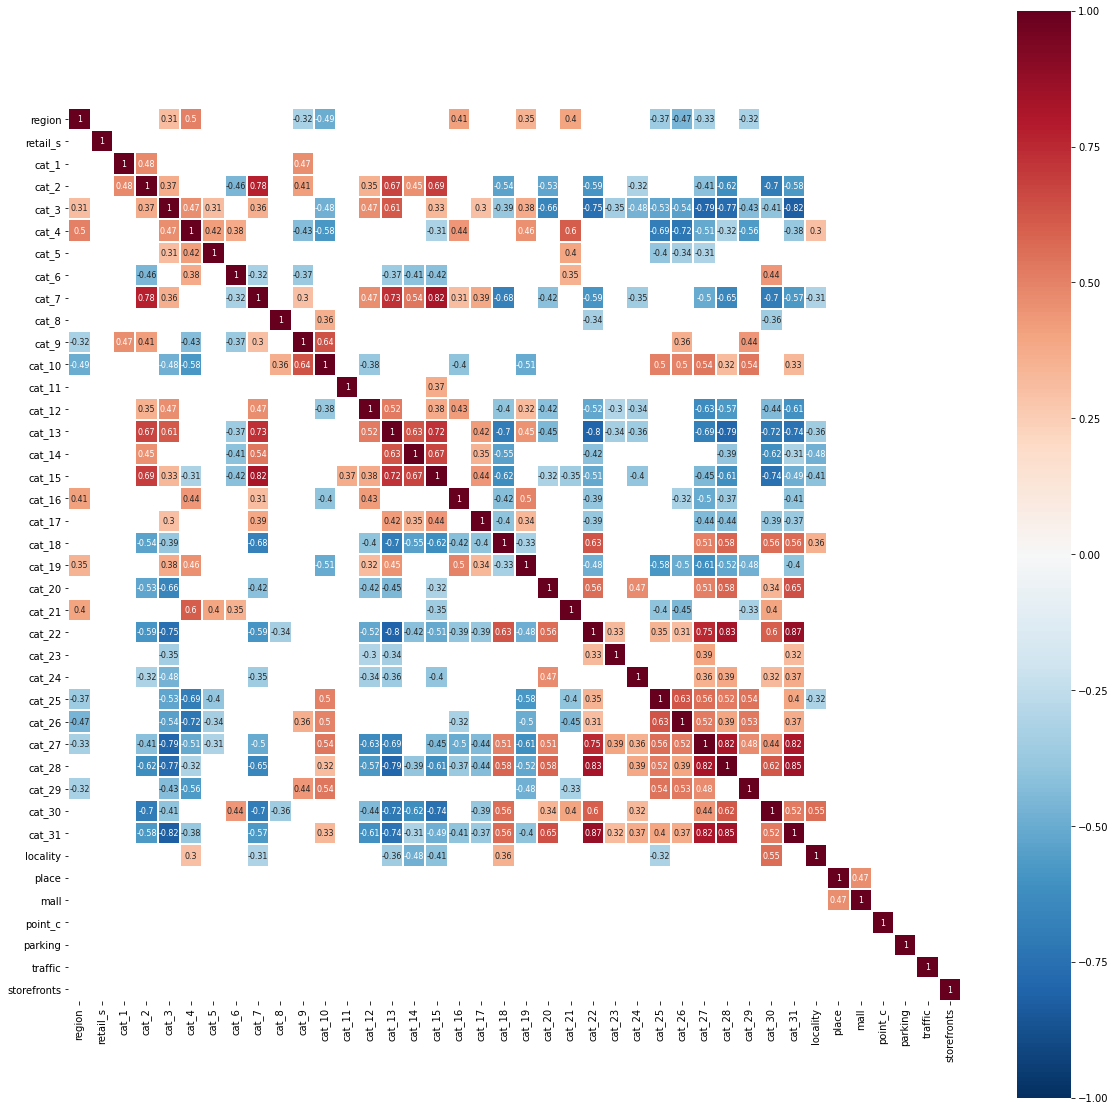

In [23]:
# Проверим данные на null
#df.isnull().any()

# Построим тепловую карту, чтоб посмотреть зависимость (расчет парных корреляций)
plt.figure(figsize=(20, 20))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],
            cmap="RdBu_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<Figure size 1440x1440 with 0 Axes>

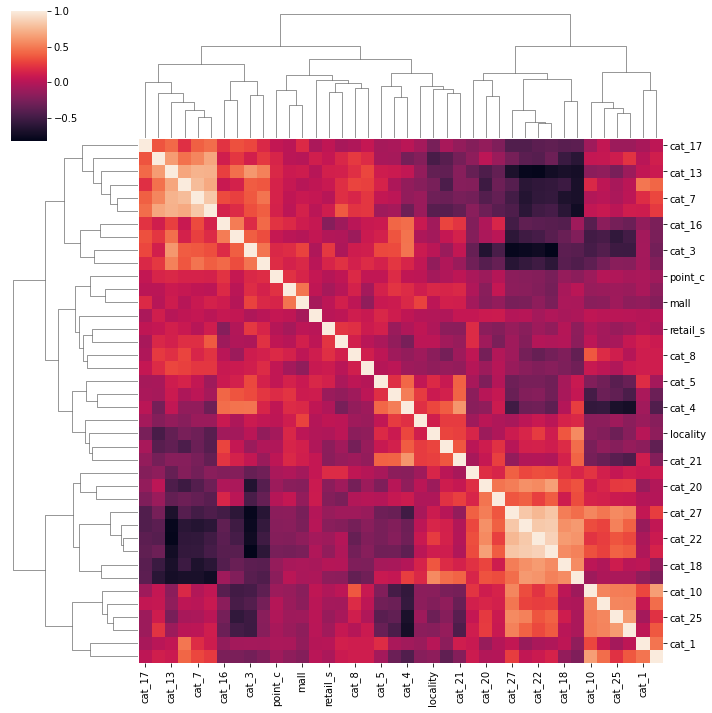

In [24]:
plt.figure(figsize=(20,20))
sns.clustermap(df.corr())

In [25]:
# Удаляем нумераццию магазинов. retail_S? cat11? place? mall? point_c? parking? traffic? storefronts?
df_clust = df.values
colum = df.columns
print(df_clust)

[[  1.  100.    0.4 ...   1.    1.    0. ]
 [  1.  120.    0.7 ...   1.    5.    0. ]
 [  1.   80.    0.4 ...   1.    1.    1. ]
 ...
 [  2.  180.    0.5 ...   1.    1.    0. ]
 [  2.  100.    0.6 ...   1.    1.    0. ]
 [  2.  120.    0.6 ...   1.    1.    0. ]]


In [26]:
# Приводим данны к нормальным значениям [-1; 1], чтобы не было разброса сильного
from sklearn.preprocessing import scale

df_clust_norm = scale(df_clust)

In [27]:
df_clust_norm

array([[-0.8952835 , -0.99006884, -1.20976398, ...,  0.75180941,
        -0.93010595, -1.10104065],
       [-0.8952835 , -0.43156847,  0.76170325, ...,  0.75180941,
         2.70764175, -1.10104065],
       [-0.8952835 , -1.54856921, -1.20976398, ...,  0.75180941,
        -0.93010595,  0.90823168],
       ...,
       [-0.48777515,  1.24393264, -0.55260824, ...,  0.75180941,
        -0.93010595, -1.10104065],
       [-0.48777515, -0.99006884,  0.1045475 , ...,  0.75180941,
        -0.93010595, -1.10104065],
       [-0.48777515, -0.43156847,  0.1045475 , ...,  0.75180941,
        -0.93010595, -1.10104065]])

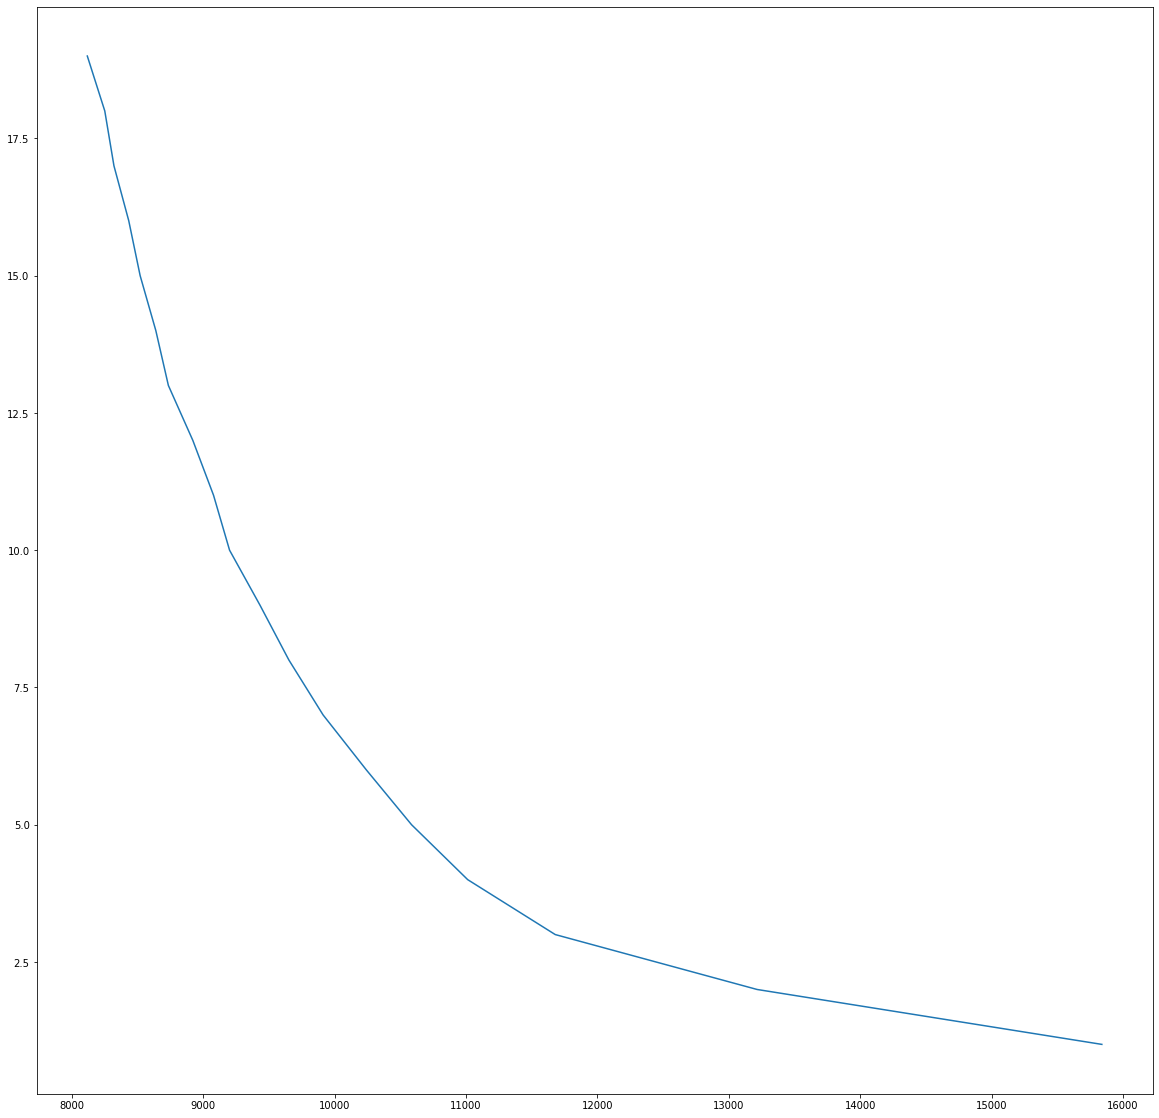

In [28]:
# Найдем количество кластеров с помощью метода "локтя"
from sklearn.cluster import KMeans

w = []

for i in range(1, 20):
    kmean = KMeans(n_clusters= i, init= 'k-means++').fit(df_clust_norm)
    w.append(kmean.inertia_)

plt.figure(figsize=(20,20))    
plt.plot(w, range(1, 20))

In [29]:
# Выбираем 3 кластера
km = KMeans(n_clusters = 3).fit(df_clust_norm)

In [30]:
km.labels_ + 1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 3,
       1, 3, 1, 1, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 3, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 3, 3,
       3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 1, 3, 2, 1, 1, 1, 3,
       3, 2, 3, 1, 2, 2, 3, 2, 2, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2, 3, 3, 2, 2,
       1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 3,
       1, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 2, 3, 1, 1, 2,
       3, 2, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 1, 3,
       2, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 3, 3, 1, 3, 2, 3,
       1, 3, 3, 2, 2, 1, 2, 1, 2, 3, 2, 3, 2, 2, 3,

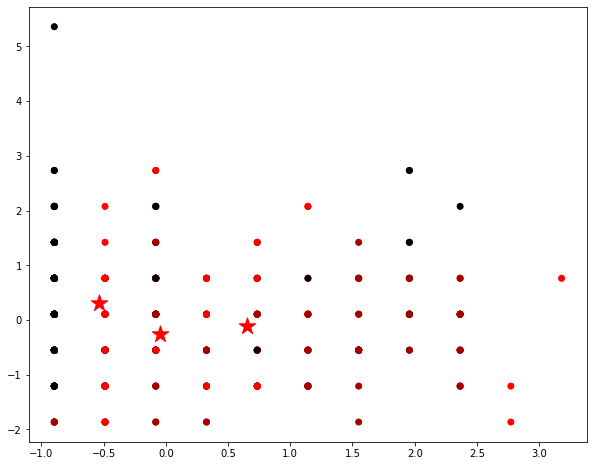

In [31]:
centroids = km.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(df_clust_norm[:,0], df_clust_norm[:,2], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, 0], centroids[:, 2], marker='*', s=300, c='r', label='centroid')
#plt.xlabel(col[0])
#plt.ylabel(col[2]);
plt.show()

In [32]:
print(colum, len(colum))

Index(['region', 'retail_s', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5',
       'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12',
       'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19',
       'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cat_24', 'cat_25', 'cat_26',
       'cat_27', 'cat_28', 'cat_29', 'cat_30', 'cat_31', 'locality', 'place',
       'mall', 'point_c', 'parking', 'traffic', 'storefronts'],
      dtype='object') 40


In [33]:
df_source['KMeans'] = km.labels_+1

In [34]:
df_source[df_source['KMeans'] == 1]

,Регион,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,...,категория 30,категория 31,Населенный пункт,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины,KMeans
11,г. Санкт-Петербург(офис: г. Санкт-Петербург),18,140,0.006,0.034,0.131,0.025,0.006,0.055,0.006,...,0.016,0.050,Город,Спальный район,пусто,"Банк, Почта, Аптека, Рынок, Мед. учреждения",Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1
13,г. Санкт-Петербург(офис: г. Санкт-Петербург),21,140,0.006,0.025,0.098,0.020,0.005,0.068,0.007,...,0.022,0.044,Моногород,Торговый центр,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1
22,Карелия респ.(офис: Карелия респ.),49,80,0.004,0.025,0.091,0.019,0.006,0.059,0.006,...,0.019,0.057,Город,Центр города,пусто,Магазины стрит-ритейла продукты,Наличие парковки,"Остановка общественного транспорта, в т.ч. метро",Наличие витрин,1
24,Ленинградская обл.(офис: г. Санкт-Петербург),52,140,0.005,0.022,0.120,0.026,0.005,0.070,0.006,...,0.025,0.051,Город,Центр города,пусто,Детские уч-я,Наличие парковки,Центральная улица,пусто,1
25,Карелия респ.(офис: Карелия респ.),54,140,0.004,0.022,0.090,0.013,0.004,0.054,0.005,...,0.017,0.059,Город,Спальный район,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...","Банк, Почта, Аптека, Рынок, Мед. учреждения",пусто,Во дворе с малой проходимостью,пусто,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Мурманская обл.(офис: Мурманская обл.),608,140,0.006,0.026,0.097,0.022,0.006,0.063,0.006,...,0.028,0.049,Область,Центр города,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1
391,Мурманская обл.(офис: Мурманская обл.),609,100,0.007,0.025,0.073,0.028,0.007,0.068,0.005,...,0.038,0.061,Область,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1
393,Мурманская обл.(офис: Мурманская обл.),612,180,0.005,0.029,0.126,0.029,0.008,0.057,0.006,...,0.022,0.046,Город,Спальный район,Торгово- Развлекательный Комплекс районного ма...,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1
394,Мурманская обл.(офис: Мурманская обл.),613,100,0.006,0.028,0.094,0.022,0.005,0.057,0.006,...,0.025,0.056,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1


In [219]:
df_source.to_excel('DS_clusters_ex2.xlsx', index=False)

In [43]:
df_source[df_source['KMeans'] == 2]

,Регион,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,...,категория 30,категория 31,Населенный пункт,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины,KMeans
0,г. Санкт-Петербург(офис: г. Санкт-Петербург),1,100,0.004,0.031,0.084,0.020,0.004,0.060,0.009,...,0.015,0.055,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
11,г. Санкт-Петербург(офис: г. Санкт-Петербург),18,140,0.006,0.034,0.131,0.025,0.006,0.055,0.006,...,0.016,0.050,Город,Спальный район,пусто,"Банк, Почта, Аптека, Рынок, Мед. учреждения",Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
13,г. Санкт-Петербург(офис: г. Санкт-Петербург),21,140,0.006,0.025,0.098,0.020,0.005,0.068,0.007,...,0.022,0.044,Моногород,Торговый центр,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
22,Карелия респ.(офис: Карелия респ.),49,80,0.004,0.025,0.091,0.019,0.006,0.059,0.006,...,0.019,0.057,Город,Центр города,пусто,Магазины стрит-ритейла продукты,Наличие парковки,"Остановка общественного транспорта, в т.ч. метро",Наличие витрин,2
24,Ленинградская обл.(офис: г. Санкт-Петербург),52,140,0.005,0.022,0.120,0.026,0.005,0.070,0.006,...,0.025,0.051,Город,Центр города,пусто,Детские уч-я,Наличие парковки,Центральная улица,пусто,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Мурманская обл.(офис: Мурманская обл.),609,100,0.007,0.025,0.073,0.028,0.007,0.068,0.005,...,0.038,0.061,Область,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
392,Мурманская обл.(офис: Мурманская обл.),611,240,0.005,0.030,0.135,0.018,0.006,0.057,0.006,...,0.017,0.049,Город,Центр города,Торгово- Развлекательный Комплекс районного ма...,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
393,Мурманская обл.(офис: Мурманская обл.),612,180,0.005,0.029,0.126,0.029,0.008,0.057,0.006,...,0.022,0.046,Город,Спальный район,Торгово- Развлекательный Комплекс районного ма...,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
394,Мурманская обл.(офис: Мурманская обл.),613,100,0.006,0.028,0.094,0.022,0.005,0.057,0.006,...,0.025,0.056,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2


In [35]:
for i in df_source.columns:
    if 'категория' in i:
        print(i, df_source[df_source['KMeans'] == 1][i].mean())       

категория 1 0.0054596774193548395
категория 2 0.027274193548387105
категория 3 0.09981451612903225
категория 4 0.024467741935483872
категория 5 0.005814516129032259
категория 6 0.06145967741935485
категория 7 0.006008064516129034
категория 8 0.03046774193548387
категория 9 0.00781451612903226
категория 10 0.01385483870967742
категория 11 0.032838709677419364
категория 12 0.0710241935483871
категория 13 0.05931451612903226
категория 14 0.00759677419354839
категория 15 0.008806451612903225
категория 16 0.035927419354838716
категория 17 0.028467741935483876
категория 18 0.029830645161290324
категория 19 0.041653225806451616
категория 20 0.021645161290322585
категория 21 0.014395161290322582
категория 22 0.059217741935483875
категория 23 0.007862903225806451
категория 24 0.007330645161290323
категория 25 0.05670161290322582
категория 26 0.05995161290322582
категория 27 0.047008064516129044
категория 28 0.042443548387096776
категория 29 0.007403225806451614
категория 30 0.025483870967741937

In [37]:
for i in df_source.columns:
    if 'категория' in i:
        print(i, df_source[df_source['KMeans'] == 3][i].mean()) 

категория 1 0.006310344827586207
категория 2 0.03759310344827586
категория 3 0.11375862068965516
категория 4 0.01913103448275862
категория 5 0.005627586206896552
категория 6 0.054751724137931036
категория 7 0.009179310344827586
категория 8 0.03689655172413793
категория 9 0.010034482758620688
категория 10 0.015551724137931034
категория 11 0.034613793103448275
категория 12 0.07482758620689654
категория 13 0.07506896551724136
категория 14 0.009648275862068966
категория 15 0.012565517241379309
категория 16 0.03715862068965517
категория 17 0.03186896551724138
категория 18 0.021613793103448273
категория 19 0.045793103448275856
категория 20 0.019806896551724136
категория 21 0.011248275862068963
категория 22 0.044875862068965516
категория 23 0.006827586206896552
категория 24 0.0062758620689655166
категория 25 0.05718620689655173
категория 26 0.06315862068965518
категория 27 0.040834482758620685
категория 28 0.0310896551724138
категория 29 0.007951724137931035
категория 30 0.014799999999999999


In [39]:
df_source[df_source['KMeans'] == 3]['Регион'].value_counts()

г. Санкт-Петербург(офис: г. Санкт-Петербург)    111
Ленинградская обл.(офис: г. Санкт-Петербург)      9
г. Москва(офис: Московская обл.)                  7
Карелия респ.(офис: Карелия респ.)                6
Мурманская обл.(офис: Мурманская обл.)            6
Псковская обл.(офис: Псковская обл.)              3
Московская обл.(офис: Московская обл.)            1
Ярославская обл.(офис: Ярославская обл.)          1
Новгородская обл.(офис: Новгородская обл.)        1
Name: Регион, dtype: int64

In [42]:
df_source[df_source['KMeans'] == 1]['Регион'].value_counts()

Мурманская обл.(офис: Мурманская обл.)          64
Новгородская обл.(офис: Новгородская обл.)      18
Карелия респ.(офис: Карелия респ.)              16
Ленинградская обл.(офис: г. Санкт-Петербург)     9
г. Санкт-Петербург(офис: г. Санкт-Петербург)     8
Псковская обл.(офис: Псковская обл.)             6
Тверская обл.(офис: Псковская обл.)              2
Вологодская обл.(офис: Карелия респ.)            1
Name: Регион, dtype: int64

In [41]:
df_source[df_source['KMeans'] == 2]['Регион'].value_counts()

Ленинградская обл.(офис: г. Санкт-Петербург)    37
г. Санкт-Петербург(офис: г. Санкт-Петербург)    19
Московская обл.(офис: Московская обл.)          18
Ярославская обл.(офис: Ярославская обл.)        15
Псковская обл.(офис: Псковская обл.)            13
Новгородская обл.(офис: Новгородская обл.)      11
г. Москва(офис: Московская обл.)                 9
Карелия респ.(офис: Карелия респ.)               5
Name: Регион, dtype: int64